In [1]:
from shapes import Point, Rectangle
from environment import Environment2D
from utils import PlotTools
from graph import Graph
from lqr import LQRPlanner
from simulate import Simulator
from plan import Plan, PlanUtils
from search import Searcher

import matplotlib.pyplot as plt
import numpy as np
import polytope as pc
%load_ext autoreload
%autoreload 2

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


In [2]:
# def generate_waypoints(A, B, x_0, u_nom):
#     T = u_nom.shape[0]
#     x_nom = np.zeros((T, A.shape[0]))
#     x_nom[0] = x_0
#     for t in range(1, T):
#         x_nom[t] = np.dot(A, x_nom[t - 1]) + np.dot(B, u_nom[t - 1])
#     return x_nom

# Env 0

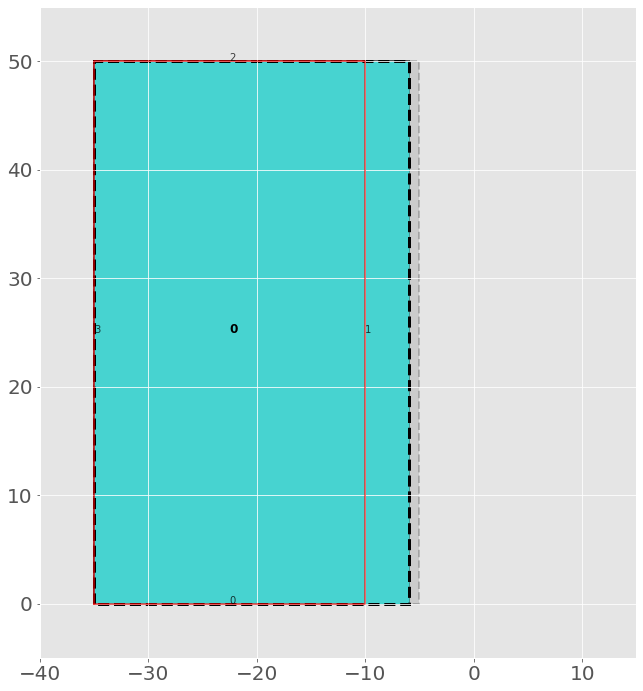

In [2]:
x_lims = [-40,15]
y_lims = [-5,55]
env = Environment2D(x_lims, y_lims)

rec_0 = Rectangle(0, -35,0,25,50,0)
rec_0.set_error_bounds(np.array([0,-5,0,0]), np.array([0,5,0,0]))
# rec_0.set_actual_errors(np.array([0,-4,0,0]))
rec_0.set_actual_errors(np.array([0,4,0,0]))
fig, ax = plt.subplots()
env.add_rectangles([rec_0])
env.plot(ax=ax)
env.rectangles[0].as_poly["actual"].plot(ax=ax)

In [3]:
dt = 0.2
A = np.eye(2); B = dt*np.eye(2)
Q_lqr = np.eye(2)
R_lqr = np.eye(2)
lqr_planner = LQRPlanner(Q_lqr, R_lqr, A, B)

dx = 1
Q = np.eye(2) * 0.1
R = 1
T = 50
x0 = [0,0]
x_noms = np.zeros((T,2))
x_noms[:,1] = np.arange(0,T*dx, dx)
u_noms = np.zeros((T,2))
u_noms[:,1] = np.ones(T) * (dx/dt)

x_est_0 = x0
P_est_0 = np.eye(2)

### Simulator stuff

In [6]:
sim = Simulator(env)
sim.set_motion(A, B, Q)
sim.set_obs(R)
sim.set_gain(lqr_planner.gain)
sim.set_init_est(x_est_0, P_est_0)
num_iters = 100
xs, x_ests, x_bars = sim.run(num_iters, x0, P_est_0, x_noms, u_noms)

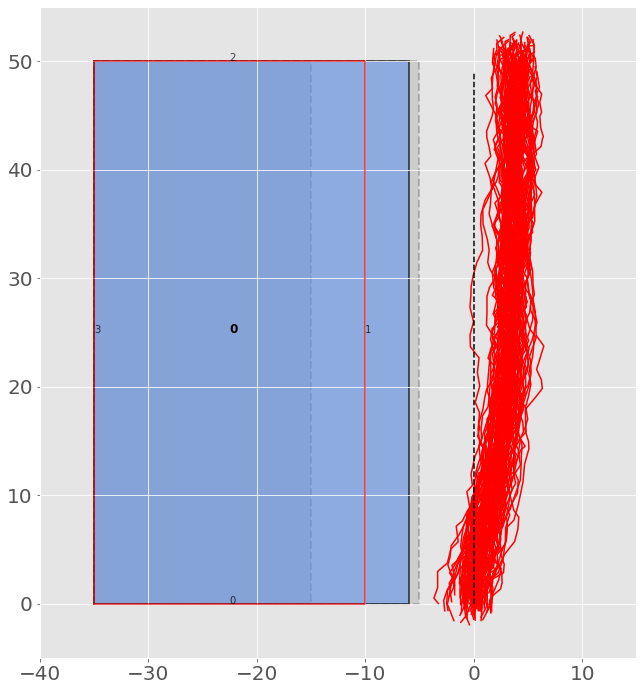

In [7]:
env.plot()
Point(x0[0],x0[1]).plot()
sim.plot_trajs(xs, x_noms)

### Graph exploration

In [4]:
x_range = np.array([x_lims, y_lims])
nsamples = 1000
tol = 1e-2
g = Graph(x0, x_range, env, lqr_planner)
g.clear()

In [5]:
g.build(1000, tol=tol)

Sampling took: 0.05 s.
Connecting took: 4.92 s.


In [6]:
# g.edges[0]

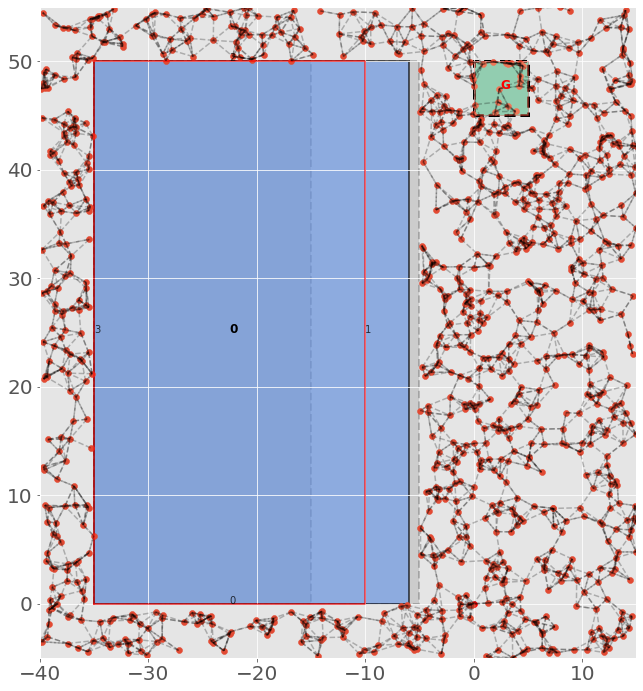

In [7]:
fig, ax = plt.subplots()
goal_region = Rectangle(-1, 0,45,5,5,0)
g.plot(ax=ax)
goal_region.plot(ax=ax,as_goal=True)
goal_region.as_poly["original"].plot(ax=ax)

In [7]:
# scaling_factors = [6,4,3,2,1]
# confid_sets_test = Xks[0].get_confidence_sets(scaling_factors)

In [8]:
# fig, ax = plt.subplots()
# env.plot(ax=ax)
# # rec_test.to_poly().plot(ax=ax)
# # confid_sets_test[0].to_poly().plot(ax=ax)
# # confid_sets_test[1].to_poly().plot(ax=ax)
# # confid_sets_test[2].to_poly().plot(ax=ax)
# # confid_sets_test[3].to_poly().plot(ax=ax)
# # confid_sets_test[4].to_poly().plot(ax=ax)

# Point(-0.1689,0.08943).plot()

In [15]:
R = 0.1
kmax = 100
lambda_coeff = 0.5
searcher = Searcher(g, lambda_coeff * g.r)
searcher.set_source()
searcher.initialize_open(Q, R, P_est_0, kmax)
searcher.set_goal(goal_region.as_poly["original"])

In [16]:
p_test = searcher.explore(0.2)

========== p = [0. 0.] at index 0 ==========
========== p = [-0.42652 -0.11538] at index 801 ==========
========== p = [-0.20153 -0.09523] at index 866 ==========
========== p = [1.32711 0.05068] at index 348 ==========


IndexError: index 100 is out of bounds for axis 2 with size 100

In [12]:
g.edges[0].keys()

dict_keys([866, 801, 566, 469, 348])

In [17]:
g.edges[0][818]

()

In [18]:
g.samples[0]

array([0., 0.])

In [19]:
g.compute_path(g.samples[0],g.samples[818], 1e-2)

(3805.2307857796272, array([[ 0.     ,  0.     ],
        [ 1.56281,  6.53329],
        [ 2.84276, 11.88406],
        [ 3.89104, 16.26636],
        [ 4.74959, 19.85548],
        [ 5.45274, 22.79497],
        [ 6.02862, 25.20242],
        [ 6.50027, 27.17413],
        [ 6.88655, 28.78897],
        [ 7.20291, 30.11152],
        [ 7.46202, 31.1947 ],
        [ 7.67423, 32.08182],
        [ 7.84802, 32.80838],
        [ 7.99036, 33.40343],
        [ 8.10694, 33.89078],
        [ 8.20242, 34.28992],
        [ 8.28062, 34.61681],
        [ 8.34466, 34.88454],
        [ 8.39711, 35.10381],
        [ 8.44007, 35.28339],
        [ 8.47525, 35.43047],
        [ 8.50406, 35.55093],
        [ 8.52766, 35.64959],
        [ 8.54699, 35.73039],
        [ 8.56282, 35.79656],
        [ 8.57578, 35.85076],
        [ 8.5864 , 35.89515],
        [ 8.5951 , 35.9315 ],
        [ 8.60222, 35.96127],
        [ 8.60805, 35.98566],
        [ 8.61283, 36.00563],
        [ 8.61674, 36.02199],
        [ 8.61995, 3

# Env 1

In [321]:
x_lims = [-10,10]
y_lims = [-5,5]
env = Environment2D(x_lims, y_lims)

rec_0 = Rectangle(0, -6.5,-3,3,5,0)
rec_1 = Rectangle(1, 1,-1,3,3,0)
rec_2 = Rectangle(2, -10,5,20,1,0)
rec_3 = Rectangle(3, -10,-6.5,20,1,0)
rec_4 = Rectangle(4, -2.5,4.5,5,0.5,0)

rec_0.set_error_bounds(np.array([0,0,0,0]), np.array([0,1.5,1.5,0]))
rec_1.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,1.5,0]))
rec_2.set_error_bounds(np.array([-0.5,0,0,0]), np.array([0.5,0,0,0]))

rec_0.set_actual_errors(np.array([0,0,1.5,0]))
rec_1.set_actual_errors(np.array([0,0,1.5,0]))
rec_2.set_actual_errors(np.array([-0.5,0,0,0]))

env.add_rectangles([rec_0, rec_1, rec_2, rec_3])
# env.add_rectangles([rec_0, rec_1, rec_2, rec_3, rec_4])
# env.add_rectangles([rec_0, rec_1, rec_3])

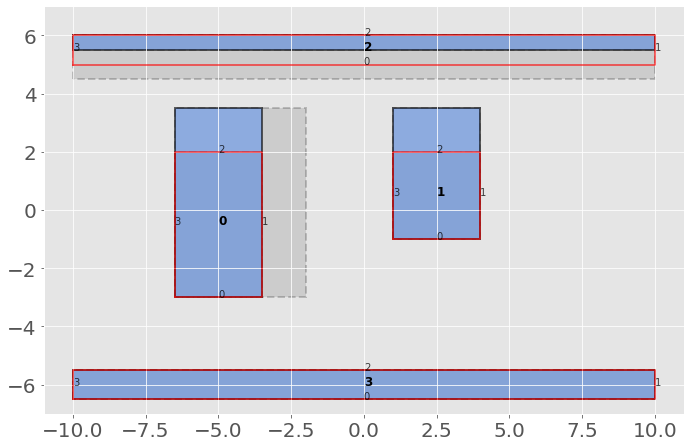

In [322]:
env.plot()

In [323]:
dt = 0.2
A = np.eye(2); B = dt*np.eye(2)
Q_lqr = 10*np.eye(2)
R_lqr = np.eye(2)
lqr_planner = LQRPlanner(Q_lqr, R_lqr, A, B)

Q = np.eye(2) * 0.001
R = 0.1
T = 280
u_noms = np.zeros((T - 1, 2))
for t in range(T - 1):
    u_noms[t] = [0.3, 0]
x0 = [-9, 3.8]
x_noms = generate_waypoints(A, B, x0, u_noms)

x_est_0 = x0
P_est_0 = np.eye(2)

sim = Simulator(env)
sim.set_motion(A, B, Q)
sim.set_obs(R)
sim.set_gain(lqr_planner.lqr_gain)
sim.set_init_est(x_est_0, P_est_0)

In [324]:
# xs = sim.rollout(x0, x_noms, u_noms)

In [325]:
num_iters = 20
xs, x_ests, x_bars = sim.run(num_iters, x0, 0.0*np.eye(2), x_noms, u_noms)

100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


In [63]:
# sim.plot_trajs(xs, x_noms)

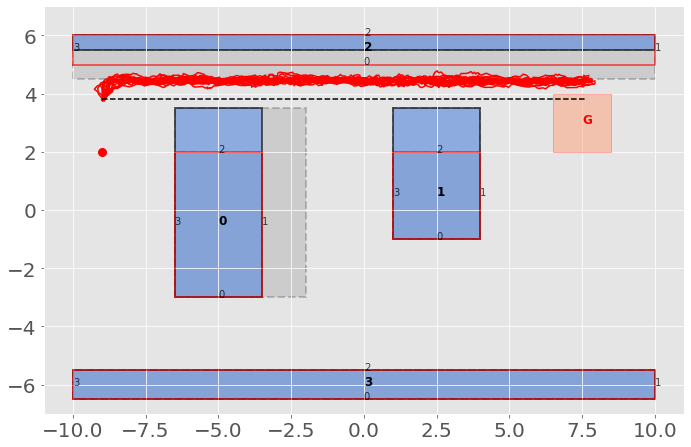

In [326]:
env.plot()
x_start = Point(-9, 2)
x_start.plot()
goal_region = Rectangle(-1, 6.5,2,2,2,0)
goal_region.plot(as_goal=True)
sim.plot_trajs(xs, x_noms)

# Env 2

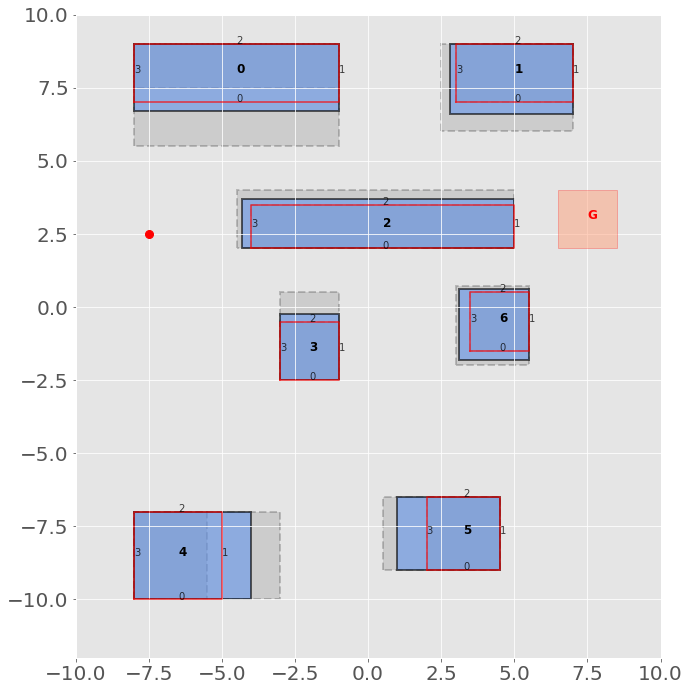

In [37]:
x_lims = [-10,10]
y_lims = [-12,10]
env = Environment2D(x_lims, y_lims)

rec_0 = Rectangle(0, -8,7,7,2,0)
rec_1 = Rectangle(1, 3,7,4,2,0)
rec_2 = Rectangle(2, -4,2,9,1.5,0)
rec_3 = Rectangle(3, -3,-2.5,2,2,0)
rec_4 = Rectangle(4, -8,-10,3,3,0)
rec_5 = Rectangle(5, 2,-9,2.5,2.5,0)
rec_6 = Rectangle(6, 3.5,-1.5,2,2,0)

rec_0.set_error_bounds(np.array([-0.5,0,0,0]), np.array([1.5,0,0,0]))
rec_1.set_error_bounds(np.array([0,0,0,0]), np.array([1,0,0,0.5]))
rec_2.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,0.5,0.5]))
rec_3.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,1,0]))
rec_4.set_error_bounds(np.array([0,-0.5,0,0]), np.array([0,2,0,0]))
rec_5.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,0,1.5]))
rec_6.set_error_bounds(np.array([0,0,0,0]), np.array([0.5,0,0.2,0.5]))

rec_0.set_actual_errors(np.array([0.3,0,0,0]))
rec_1.set_actual_errors(np.array([0.4,0,0,0.2]))
rec_2.set_actual_errors(np.array([0,0,0.2,0.3]))
rec_3.set_actual_errors(np.array([0,0,0.25,0]))
rec_4.set_actual_errors(np.array([0,1,0,0]))
rec_5.set_actual_errors(np.array([0,0,0,1]))
rec_6.set_actual_errors(np.array([0.3,0,0.1,0.4]))

env.add_rectangles([rec_0, rec_1, rec_2, rec_3, rec_4, rec_5, rec_6])

env.plot()
x_start = Point(-7.5, 2.5)
x_start.plot()
goal_region = Rectangle(-1, 6.5,2,2,2,0)
goal_region.plot(as_goal=True)